# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Data collection and analysis

In [6]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [7]:
#Displaying first five rows of a dataset
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
#Displaying last five rows of a dataset
exercise_data.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5


In [9]:
calorie_data = pd.read_csv('/content/calories.csv')

In [10]:
calorie_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


# Joining both dataframe

In [11]:
new_data = pd.concat([exercise_data, calorie_data['Calories']], axis=1)

In [12]:
new_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
# Checking the no. of rows and columns in a dataframe
new_data.shape

(15000, 9)

In [14]:
#Checking some info of the dataframe
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [15]:
#Checking the no. of missing values in a dataset
new_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

**Categorical Data**

- Gender

In [16]:
#Displaying the distribution of gender data
new_data['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [17]:
#Converting the categorical data into numerical data
new_data.replace({'Gender':{'female':0,'male':1}}, inplace=True)

In [18]:
#checking the gender column
print(new_data['Gender'])

0        1
1        0
2        1
3        0
4        0
        ..
14995    0
14996    0
14997    0
14998    1
14999    1
Name: Gender, Length: 15000, dtype: int64


**Numerical Data**

- User_ID
- Age
- Height
- Weight
- Duration
- Heart_Rate
- Body_Temp
- Calories

In [19]:
# printing first five rows of data again.
new_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


# Data analysis

In [50]:
# Getting some statstistial value
new_data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [51]:
# geting mean value of gender
new_data.groupby('Gender').mean()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,,,,,,,,
0,1.497932e+07,42.735469,164.405931,63.274460,15.502185,95.408579,40.019833,88.153052
1,1.497537e+07,42.844904,184.667517,86.825702,15.559420,95.630052,40.031153,90.945750


In [52]:
new_data['Gender'].mean()

0.49646666666666667

In [20]:
correlation = new_data.corr()

<Axes: >

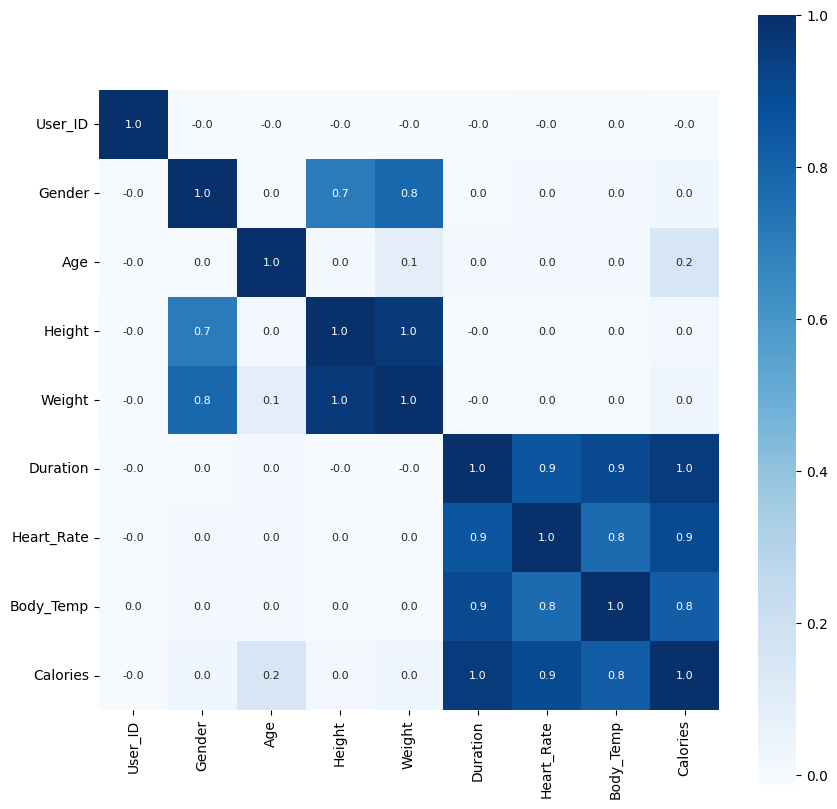

In [21]:
# Constructing heat map of data
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


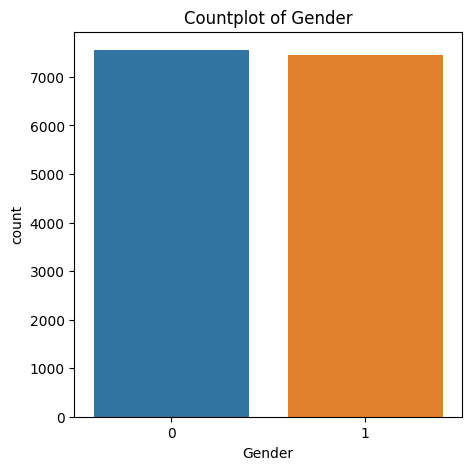

In [24]:
# Count plot of gender column
plt.figure(figsize=(5,5))
sns.countplot(data=new_data, x='Gender')
plt.title("Countplot of Gender")
plt.show()

<Figure size 500x500 with 0 Axes>

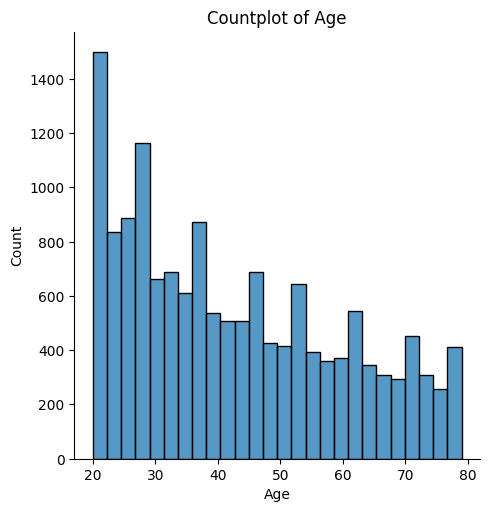

In [29]:
# Displot of Age

plt.figure(figsize=(5,5))
sns.displot(data=new_data, x='Age')
plt.title("Countplot of Age")
plt.show()

<Figure size 500x500 with 0 Axes>

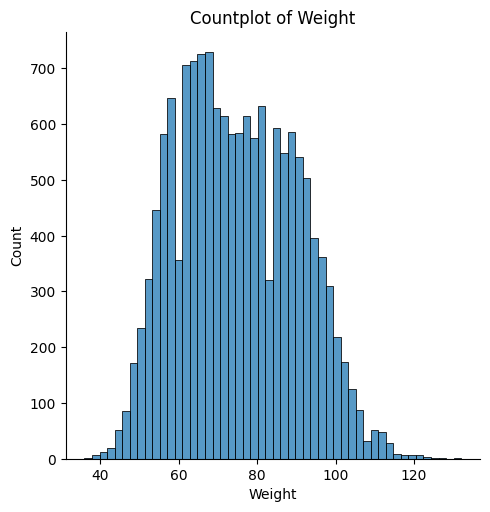

In [30]:
# Displot of Weight

plt.figure(figsize=(5,5))
sns.displot(data=new_data, x='Weight')
plt.title("Countplot of Weight")
plt.show()

<Figure size 500x500 with 0 Axes>

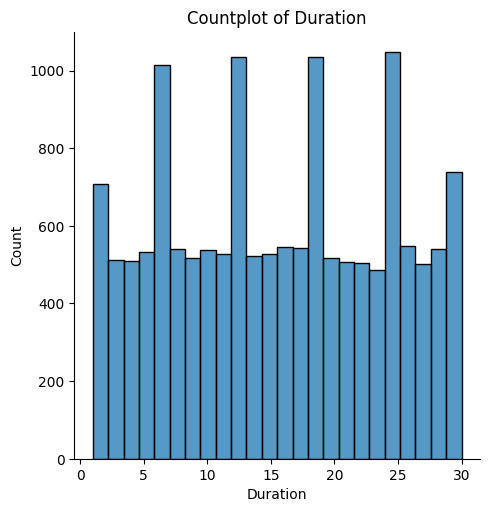

In [31]:
# Displot of Duration

plt.figure(figsize=(5,5))
sns.displot(data=new_data, x='Duration')
plt.title("Countplot of Duration")
plt.show()

<Figure size 500x500 with 0 Axes>

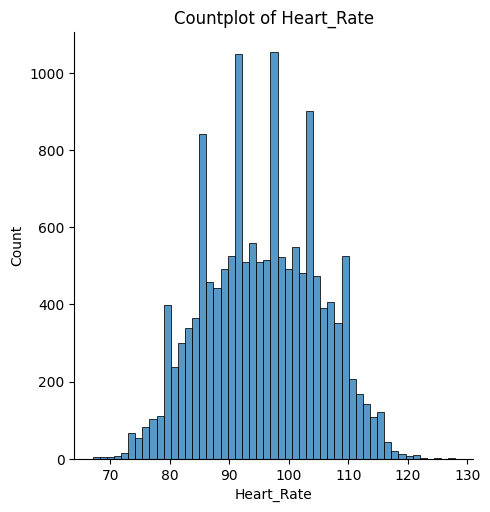

In [32]:
# Displot of Heart_Rate

plt.figure(figsize=(5,5))
sns.displot(data=new_data, x='Heart_Rate')
plt.title("Countplot of Heart_Rate")
plt.show()

<Figure size 500x500 with 0 Axes>

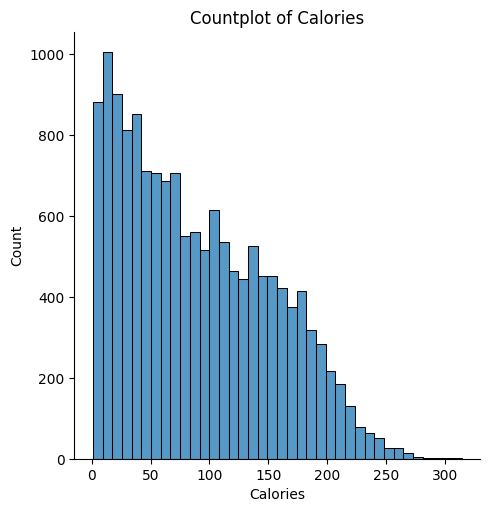

In [33]:
# Displot of Calories

plt.figure(figsize=(5,5))
sns.displot(data=new_data, x='Calories')
plt.title("Countplot of Calories")
plt.show()

<Figure size 500x500 with 0 Axes>

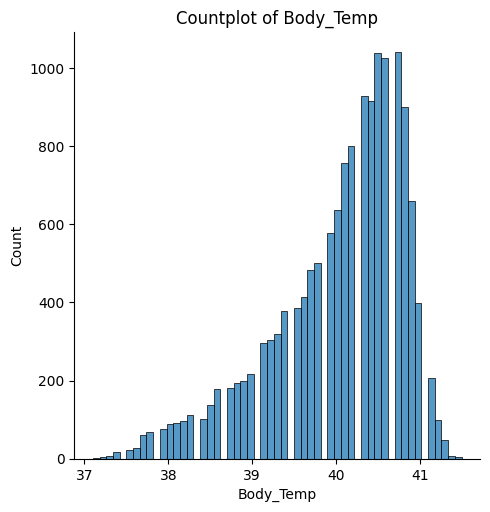

In [34]:
# Displot of body temp

plt.figure(figsize=(5,5))
sns.displot(data=new_data, x='Body_Temp')
plt.title("Countplot of Body_Temp")
plt.show()

# Splitting the data into target and features

In [35]:
X= new_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y=new_data['Calories']

In [36]:
print(X,Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns] 0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

# Splitting data into train test 

In [37]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# Training a model

Here, we are using XGBoost Regressor

In [39]:
regressor = XGBRegressor()

In [40]:
# Training the data into the regressor model
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Model Evaluation

In [41]:
# Predicting the accuracy of the training data 
X_train_prediction = regressor.predict(X_train)

In [43]:
# R squared error
error_score = metrics.r2_score(Y_train, X_train_prediction)
print("R square error on a training data is :", error_score)

R square error on a training data is : 0.9995517443430838


In [44]:
# predicting the accurac of the testing data
X_test_prediction = regressor.predict(X_test)

In [46]:
# R squared error
error_score = metrics.r2_score(Y_test, X_test_prediction)
print("R square error on a testing data is :", error_score)

R square error on a testing data is : 0.9988455491362879


# data visualization between predicted calories and acutal calories

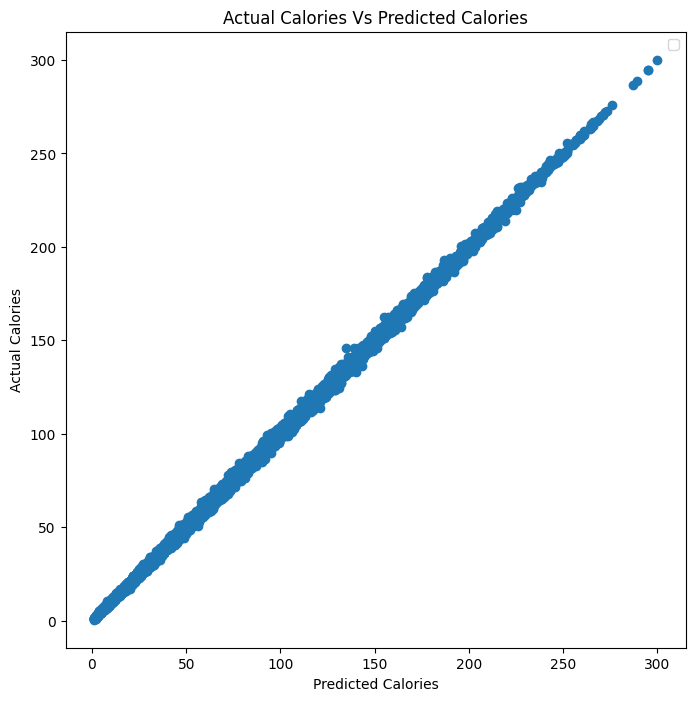

In [47]:
# Visualizing on a training data
plt.figure(figsize=(8,8))
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Predicted Calories")
plt.ylabel("Actual Calories")
plt.title("Actual Calories Vs Predicted Calories")
plt.legend()
plt.show()

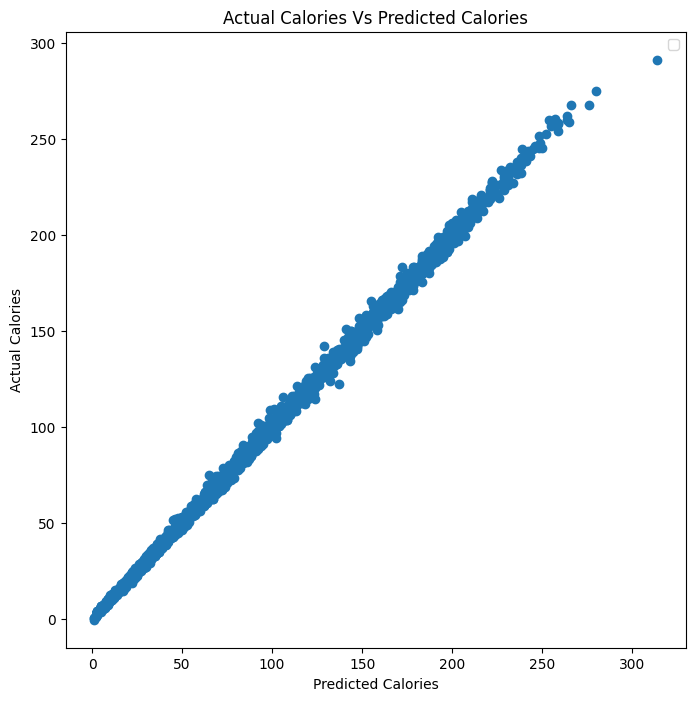

In [48]:
# Visualizing on a testing data
plt.figure(figsize=(8,8))
plt.scatter(Y_test, X_test_prediction)
plt.xlabel("Predicted Calories")
plt.ylabel("Actual Calories")
plt.title("Actual Calories Vs Predicted Calories")
plt.legend()
plt.show()

# Building a predictive model

In [49]:
input_data = (0,20,166.0,60.0,14.0,94.0,40.3)

#Converting the input data into numpy array
input_data_as_array = np.asarray(input_data)

#Reshaping the numpy array as we are doing for one instance only.
input_data_reshaped = input_data_as_array.reshape(1,-1)

#prediction
prediction = regressor.predict(input_data_reshaped)
print(prediction)


#Condition
if (prediction[0] < 70):
  print("The Calories burnt is Low !")

else:
  print("The Calories burtn is High !")

[64.68266]
The Calories burnt is Low !
